<a href="https://www.kaggle.com/code/krishnasrmcem/google-stock-price-prediction-lstm?scriptVersionId=103116263" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project : Google Stock price prediction(LSTM)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock-price/Google_Stock_Price_Test.csv
/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv


In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Import Dataset

In [3]:
dataset_train = pd.read_csv('../input/google-stock-price/Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


# Defining training set

In [5]:
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


# Feature scaling with MinMaxScalar

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# Creating X & y training data

In [7]:

X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)


(1198, 60)
(1198,)


# Reshape the data

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

# Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.

In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [10]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences= True)) 
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout (0.2))

regressor.add(Dense (units=1))

2022-08-12 07:09:36.148450: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Fitting the Model

In [11]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

2022-08-12 07:09:37.486226: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
38/38 [==============================] - 17s 216ms/step - loss: 0.0458
Epoch 2/50
38/38 [==============================] - 8s 218ms/step - loss: 0.0065
Epoch 3/50
38/38 [==============================] - 9s 233ms/step - loss: 0.0052
Epoch 4/50
38/38 [==============================] - 8s 218ms/step - loss: 0.0053
Epoch 5/50
38/38 [==============================] - 8s 219ms/step - loss: 0.0051
Epoch 6/50
38/38 [==============================] - 8s 219ms/step - loss: 0.0051
Epoch 7/50
38/38 [==============================] - 9s 234ms/step - loss: 0.0045
Epoch 8/50
38/38 [==============================] - 8s 216ms/step - loss: 0.0048
Epoch 9/50
38/38 [==============================] - 8s 215ms/step - loss: 0.0043
Epoch 10/50
38/38 [==============================] - 8s 216ms/step - loss: 0.0044
Epoch 11/50
38/38 [==============================] - 9s 231ms/step - loss: 0.0040
Epoch 12/50
38/38 [==============================] - 8s 213ms/step - loss: 0.0040
Epoch 13/50
38/38 [=====

# Extracting Actual data

In [12]:
dataset_test = pd.read_csv('../input/google-stock-price/Google_Stock_Price_Test.csv')
actual_stock_price = dataset_test.iloc[:, 1:2].values


# Preparing the Input for our Model

In [13]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total [len(dataset_total)- len(dataset_test)-60:].values
print(inputs)
print('\n')

inputs = inputs.reshape(-1,1)
print(inputs)
print('\n')

inputs = scaler.transform(inputs)
print(inputs)
print('\n')


X_test = []

for i in range(60,80):
    X_test.append(inputs [i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

[779.   779.66 777.71 786.66 783.76 781.22 781.65 779.8  787.85 798.24
 803.3  795.   804.9  816.68 806.34 801.   808.35 795.47 782.89 778.2
 767.25 750.66 774.5  783.4  779.94 791.17 756.54 755.6  746.97 755.2
 766.92 771.37 762.61 772.63 767.73 764.26 760.   771.53 770.07 757.44
 744.59 757.71 764.73 761.   772.48 780.   785.04 793.9  797.4  797.34
 800.4  790.22 796.76 795.84 792.36 790.9  790.68 793.7  783.33 782.75
 778.81 788.36 786.08 795.26 806.4  807.86 805.   807.14 807.48 807.08
 805.81 805.12 806.91 807.25 822.3  829.62 837.81 834.71 814.66 796.86]


[[779.  ]
 [779.66]
 [777.71]
 [786.66]
 [783.76]
 [781.22]
 [781.65]
 [779.8 ]
 [787.85]
 [798.24]
 [803.3 ]
 [795.  ]
 [804.9 ]
 [816.68]
 [806.34]
 [801.  ]
 [808.35]
 [795.47]
 [782.89]
 [778.2 ]
 [767.25]
 [750.66]
 [774.5 ]
 [783.4 ]
 [779.94]
 [791.17]
 [756.54]
 [755.6 ]
 [746.97]
 [755.2 ]
 [766.92]
 [771.37]
 [762.61]
 [772.63]
 [767.73]
 [764.26]
 [760.  ]
 [771.53]
 [770.07]
 [757.44]
 [744.59]
 [757.71]
 [764.73]
 

# Predicting the price

In [14]:
predicted_stock_price = regressor.predict(X_test)
print(predicted_stock_price)
print('\n')

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[0.98108876]
 [0.9777211 ]
 [0.97433794]
 [0.97140646]
 [0.96963674]
 [0.9698685 ]
 [0.972353  ]
 [0.9766038 ]
 [0.9819555 ]
 [0.9876908 ]
 [0.99316216]
 [0.9978474 ]
 [1.0014352 ]
 [1.0039377 ]
 [1.0055178 ]
 [1.0071204 ]
 [1.0096538 ]
 [1.0138056 ]
 [1.0193852 ]
 [1.0247928 ]]


[[806.51404]
 [804.70374]
 [802.8851 ]
 [801.3092 ]
 [800.3579 ]
 [800.4825 ]
 [801.81805]
 [804.10315]
 [806.98   ]
 [810.06305]
 [813.0042 ]
 [815.5228 ]
 [817.4515 ]
 [818.79675]
 [819.6461 ]
 [820.5076 ]
 [821.86945]
 [824.1013 ]
 [827.1007 ]
 [830.00757]]


# Plotting the price (Actual Vs Predicted)

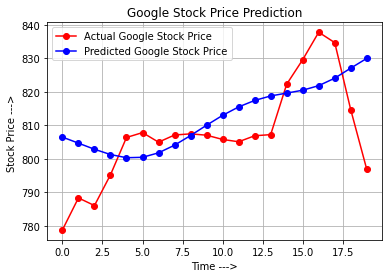

In [15]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price', marker='o')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price', marker='o')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time --->')
plt.ylabel('Stock Price ---> ')
plt.grid()
plt.legend()